In [11]:
import matplotlib.pyplot as plt

from qwfs.qwfs_result import QWFSResult
%autoreload 2
%matplotlib ipympl
import os 
import numpy as np 
np.random.seed(42)
from qwfs.qwfs_simulation import QWFSSimulation, tnow
DATA_DIR = os.path.join(os.path.abspath(os.path.curdir), 'data')

### generate results

In [39]:
N_modes = 512 
N_tries = 1
configs = ['SLM1-only-TT'] # , 'SLM1-after']
T_methods = ['gaus_iid']
algos = ['autograd-lbfgs']
# cost_function = 'energy'
cost_function = 'contrast'
saveto_path = rf'{DATA_DIR}\contrast\{tnow()}_cost_{cost_function}_{N_tries}_tries_Nmodes_{N_modes}.npz'

s = QWFSSimulation(N=N_modes)
s.cost_function = cost_function
res = s.statistics(algos=algos, configs=configs, T_methods=T_methods, N_tries=N_tries, saveto_path=saveto_path, save_Ts=False, save_phases=False)

try_no=0


### load result

In [42]:
# res.show_scatterplots()
import glob
from qwfs.qwfs_result import QWFSResult
# path = glob.glob(rf'{DATA_DIR}\contrast\*cost_energy*')[-1]
path = glob.glob(rf'{DATA_DIR}\contrast\*cost_contrast*')[0]
res = QWFSResult(path=path)

### View statistics

In [43]:
i = 0 # Gaussian IID
# i = 1 # Gaussian IID
optimized = res.results[i, :, :, 0].mean(axis=1)
optimized_std = res.results[i, :, :, 0].std(axis=1)
tot_power = res.tot_power_results[i, :, :, 0].mean(axis=1)
tot_power_std = res.tot_power_results[i, :, :, 0].std(axis=1)
background = tot_power - optimized

print('cost_function:', res.cost_function)
print('configs:   ', res.configs)
print(f'optimized: {optimized}+-{optimized_std}')
print(f'tot_power: {tot_power}+-{tot_power_std}')
print(f'background:', tot_power - optimized)
print(f'contrast:', optimized / background)
print(f'energy_from_tot:', optimized / tot_power)
print('pi/4 =', np.pi/4)

cost_function: contrast
configs:    ['SLM1-only-TT' 'SLM1-after']
optimized: [0.08488078 0.77796544]+-[0.00737504 0.03208116]
tot_power: [0.11612032 0.98799976]+-[0.00918211 0.04171723]
background: [0.03123954 0.21003432]
contrast: [2.71709441 3.70399202]
energy_from_tot: [0.73097267 0.78741461]
pi/4 = 0.7853981633974483


### Rerun and view distribution
right after generating results, just the last thing that ran 

0.1355329409888085


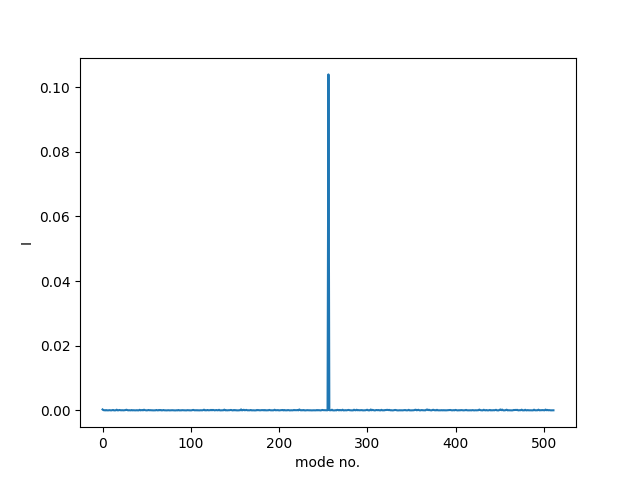

In [40]:
v_out = s.propagate()
I_out = (np.abs(v_out) ** 2)
fig, ax = plt.subplots()
ax.plot(I_out)
ax.set_xlabel('mode no.')
ax.set_ylabel('I')
print(I_out.sum())

-----------------------------------
# old

In [ ]:
v_out = s.propagate()
I_out = (np.abs(v_out) ** 2)
print(I_out)
print(I_out.sum())
print(sorted(I_out.flatten().tolist(), reverse=True))

In [ ]:
i1 = 22
i2 = 345
res.Ts[0][i1, i2] == res.Ts[0][i2, i1]


In [ ]:
import numpy as np
N, trials = 128, 5000
bg = []
for _ in range(trials):
   T = (np.random.randn(N,N)+1j*np.random.randn(N,N))/np.sqrt(2*N)
   A = T @ T.T
   s  = np.exp(-1j*np.angle(A[0]))
   v  = A @ (s / np.sqrt(N))
   bg.append(np.sum(np.abs(v)**2) - np.abs(v[0])**2)
print(np.mean(np.abs(v[0])**2), np.mean(bg))
